# Multicolinearity

### Task#1

a. Load relevant librraies

b. Load 401ksybs.xls as a pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pensions = pd.read_excel('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/401ksubs.xls')

In [ ]:
pensions

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428,1,0,33,4,-1.200,0,0,3413.8310,1089
9271,0,24.546,0,1,37,3,2.000,0,0,602.5061,1369
9272,0,38.550,1,0,33,3,-13.600,0,1,1486.1020,1089
9273,0,34.410,1,0,57,3,3.550,0,0,1184.0480,3249


### Task# 2

a. Create a correlation matrix on this dataset.

b. Do you observe any multicolinearity problem? Identify those fields.

In [ ]:
correlation = pensions.corr()
correlation

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
e401k,1.000000,0.268178,0.080843,-0.027641,0.031526,0.012015,0.143950,0.769170,0.118643,0.206618,0.017526
inc,0.268178,1.000000,0.362008,-0.069871,0.105638,0.110170,0.376586,0.270833,0.364354,0.940161,0.087305
marr,0.080843,0.362008,1.000000,-0.363950,0.059047,0.564814,0.075039,0.085636,0.116925,0.280060,0.054500
male,-0.027641,-0.069871,-0.363950,1.000000,-0.120297,-0.320678,-0.018132,-0.024949,-0.036361,-0.053715,-0.116235
age,0.031526,0.105638,0.059047,-0.120297,1.000000,-0.030536,0.203906,0.025977,0.238557,0.097584,0.992619
fsize,0.012015,0.110170,0.564814,-0.320678,-0.030536,1.000000,-0.031506,0.014296,-0.043629,0.079570,-0.055924
nettfa,0.143950,0.376586,0.075039,-0.018132,0.203906,-0.031506,1.000000,0.187392,0.345917,0.407568,0.203703
p401k,0.769170,0.270833,0.085636,-0.024949,0.025977,0.014296,0.187392,1.000000,0.153033,0.222113,0.015740
pira,0.118643,0.364354,0.116925,-0.036361,0.238557,-0.043629,0.345917,0.153033,1.000000,0.322805,0.233543
incsq,0.206618,0.940161,0.280060,-0.053715,0.097584,0.079570,0.407568,0.222113,0.322805,1.000000,0.082991


In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: >

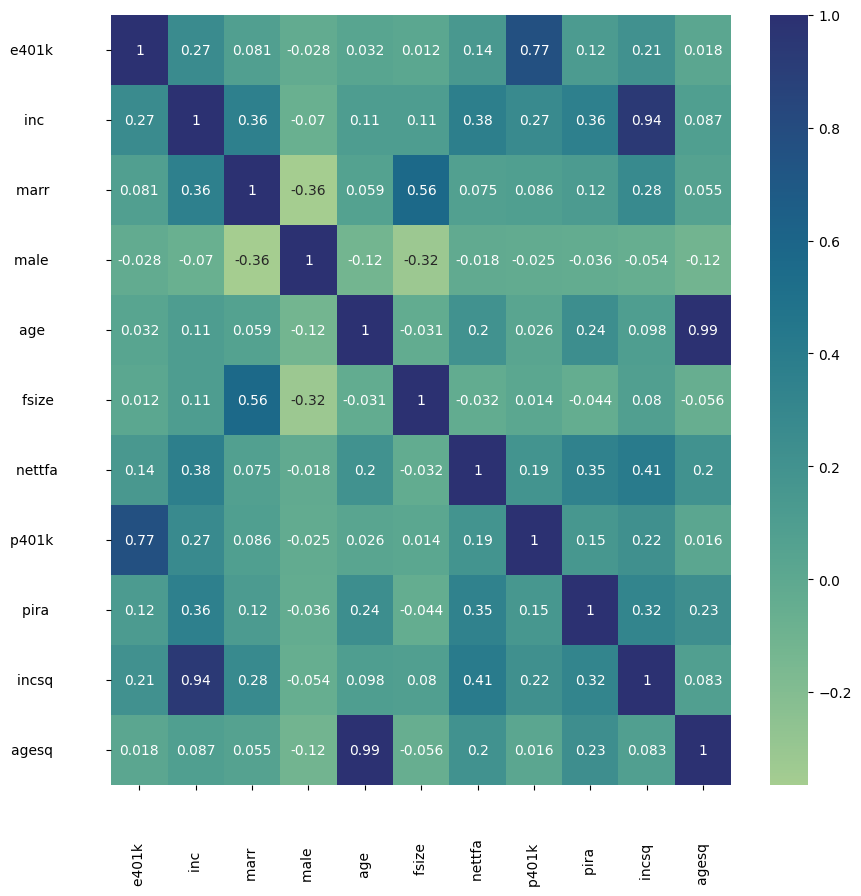

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(correlation, annot = True, cmap = 'crest')

### Task# 3

a. Compute VIF on this dataset.

b. Do you observe any multicolinearity problem?

c. Does your VIF scores matches with your hypothesis from correlation matrix?

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
print(pensions.columns)

Index(['e401k           ', 'inc             ', 'marr            ',
       'male            ', 'age             ', 'fsize           ',
       'nettfa          ', 'p401k           ', 'pira            ',
       'incsq           ', 'agesq           '],
      dtype='object')


In [ ]:
X = sm.add_constant(pensions[['p401k           ', 'e401k           ', 'inc             ', 'incsq           ', 'age             ', 'agesq           ', 'marr            ', 'fsize           ']])
X

,const,p401k,e401k,inc,incsq,age,agesq,marr,fsize
0,1.0,0,0,13.170,173.4489,40,1600,0,1
1,1.0,1,1,61.230,3749.1130,35,1225,0,1
2,1.0,0,0,12.858,165.3282,44,1936,1,2
3,1.0,0,0,98.880,9777.2540,44,1936,1,2
4,1.0,0,0,22.614,511.3930,53,2809,0,1
...,...,...,...,...,...,...,...,...,...
9270,1.0,0,0,58.428,3413.8310,33,1089,1,4
9271,1.0,0,0,24.546,602.5061,37,1369,0,3
9272,1.0,0,0,38.550,1486.1020,33,1089,1,3
9273,1.0,0,0,34.410,1184.0480,57,3249,1,3


In [ ]:
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)
vif

,0
const,287.436474
p401k,2.477192
e401k,2.508214
inc,10.215247
incsq,9.193763
age,75.118606
agesq,75.241747
marr,1.816012
fsize,1.608852


### Task# 4

a. How would you cater to this problem?

In [ ]:
pensions.drop('inc             ', axis = 1, inplace = True)
pensions.drop('agesq           ', axis = 1, inplace = True)
pensions

,e401k,marr,male,age,fsize,nettfa,p401k,pira,incsq
0,0,0,0,40,1,4.575,0,1,173.4489
1,1,0,1,35,1,154.000,1,0,3749.1130
2,0,1,0,44,2,0.000,0,0,165.3282
3,0,1,1,44,2,21.800,0,0,9777.2540
4,0,0,0,53,1,18.450,0,0,511.3930
...,...,...,...,...,...,...,...,...,...
9270,0,1,0,33,4,-1.200,0,0,3413.8310
9271,0,0,1,37,3,2.000,0,0,602.5061
9272,0,1,0,33,3,-13.600,0,1,1486.1020
9273,0,1,0,57,3,3.550,0,0,1184.0480


## Task# 5

a. Compute vif again on pensions data after droping high multicolinear points.

b. Do you observe any change in VIF values?

In [ ]:
New_X = sm.add_constant(pensions[['p401k           ', 'e401k           ', 'incsq           ', 'age             ', 'marr            ', 'fsize           ']])
New_X

,const,p401k,e401k,incsq,age,marr,fsize
0,1.0,0,0,173.4489,40,0,1
1,1.0,1,1,3749.1130,35,0,1
2,1.0,0,0,165.3282,44,1,2
3,1.0,0,0,9777.2540,44,1,2
4,1.0,0,0,511.3930,53,0,1
...,...,...,...,...,...,...,...
9270,1.0,0,0,3413.8310,33,1,4
9271,1.0,0,0,602.5061,37,0,3
9272,1.0,0,0,1486.1020,33,1,3
9273,1.0,0,0,1184.0480,57,1,3


In [ ]:
New_vif = pd.Series([variance_inflation_factor(New_X.values, i) for i in range(New_X.shape[1])], index = New_X.columns)
New_vif

,0
const,21.416894
p401k,2.474485
e401k,2.457544
incsq,1.153133
age,1.015817
marr,1.608206
fsize,1.491097


# Heteroscedasticity

We will come back to this exercise when we know enough about Linear Regression.

# Normality

### Task# 5

a. Read data from https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/CAR%20DETAILS.csv

b. Create a histogram on Selling price field.

d. Is this field following proper normal distribution.



In [ ]:
car = pd.read_csv('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/CAR%20DETAILS.csv')
car

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,Petrol,Individual,Manual,First Owner
1,135000,50000,Petrol,Individual,Manual,First Owner
2,600000,100000,Diesel,Individual,Manual,First Owner
3,250000,46000,Petrol,Individual,Manual,First Owner
4,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner
4336,409999,80000,Diesel,Individual,Manual,Second Owner
4337,110000,83000,Petrol,Individual,Manual,Second Owner
4338,865000,90000,Diesel,Individual,Manual,First Owner


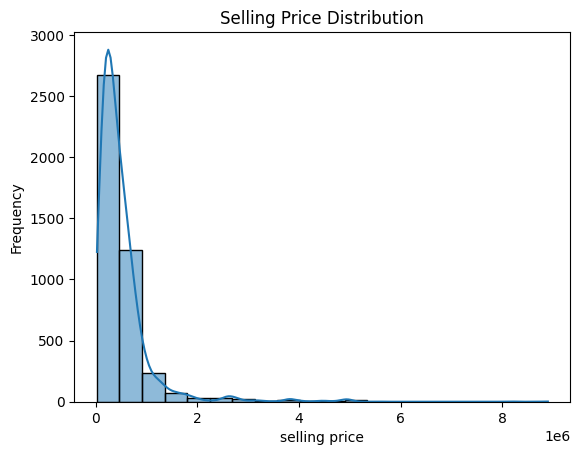

In [ ]:
sn.histplot(car['selling_price'], bins = 20, edgecolor = 'black', kde=True)
plt.title('Selling Price Distribution')
plt.xlabel('selling price')
plt.ylabel('Frequency')
plt.show()

### Task# 6

*For Normal Distribution, Skewness = 0, Kurtosis = 3*

a. Compute skewness and kurtosis of selling_price field.

b. Is this field following normal distribution?

In [ ]:
skewness = car['selling_price'].skew()
skewness

4.892021472306356

In [ ]:
kurtosis = car['selling_price'].kurtosis()
kurtosis

37.08754263212727

### Task# 7

a. Apply log transformation on selling price field and create log_selling_price.

b. Compute skewness and kurtosis

c. Create a histogram on log_selling_price.

d. Do you think normality has been achieved?

In [ ]:
advertising['log_sales'] = np.log(advertising['sales(millionUSD)'])
advertising

,TV(millionUSD),SocialMedia(millionUSD),newspaper(millionUSD),sales(millionUSD),log_sales
0,230.1,37.8,69.2,22.1,3.095578
1,44.5,39.3,45.1,10.4,2.341806
2,17.2,45.9,69.3,9.3,2.230014
3,151.5,41.3,58.5,18.5,2.917771
4,180.8,10.8,58.4,12.9,2.557227
...,...,...,...,...,...
144,96.2,14.8,38.9,11.4,2.433613
145,140.3,1.9,9.0,10.3,2.332144
146,240.1,7.3,8.7,13.2,2.580217
147,243.2,49.0,44.3,25.4,3.234749


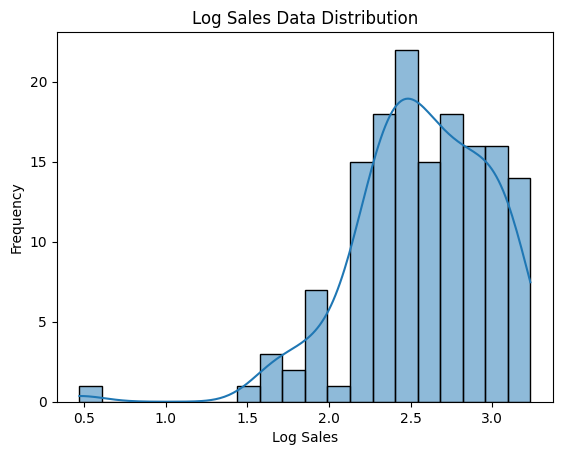

In [ ]:
sn.histplot(advertising['log_sales'], bins = 20, edgecolor = 'black', kde=True)
plt.title('Log Sales Data Distribution')
plt.xlabel('Log Sales')
plt.ylabel('Frequency')
plt.show()

### Task# 6

a. Tranform Sales field such that it follows normal distribution.

### Task# 7

a. Read data from: https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/ceosal1.xls

b. Create histogram on 'salary', and 'lsalary' field.

c. What do you observe?

In [10]:
ceosal = pd.read_excel('https://raw.githubusercontent.com/ayeshaamjad0828/Data-Science-with-Python-101/main/Datasets/ceosal1.xls')
ceosal.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225390
1,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894


In [14]:
ceosal.columns

Index(['salary                   ', 'pcsalary                 ',
       'sales                    ', 'roe                      ',
       'pcroe                    ', 'ros                      ',
       'indus                    ', 'finance                  ',
       'consprod                 ', 'utility                  ',
       'lsalary                  ', 'lsales                   '],
      dtype='object')

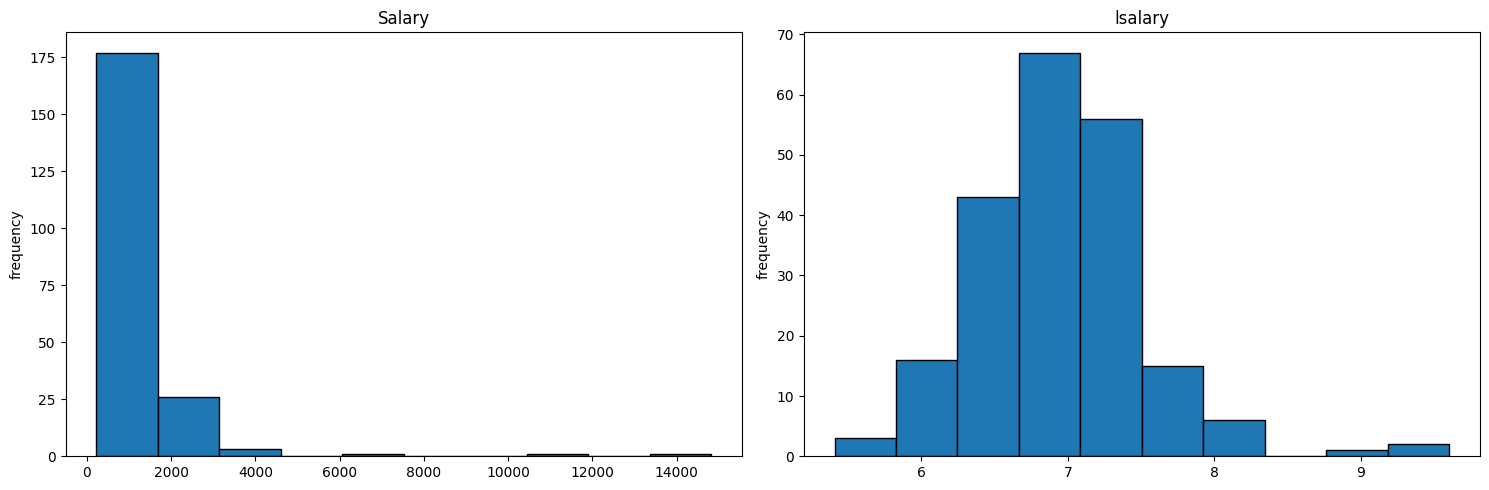

In [15]:
##MATPLOTLIB

# Create scatter plots
plt.figure(figsize=(15, 5))

#salary
plt.subplot(1, 2, 1)
plt.hist(ceosal['salary                   '], edgecolor = 'black')
plt.title('Salary')
plt.ylabel('frequency')


#lsalary
plt.subplot(1, 2, 2)
plt.hist(ceosal['lsalary                  '], edgecolor = 'black')
plt.title('lsalary')
plt.ylabel('frequency')

# Show plot
plt.tight_layout()
plt.show()

# Class Imbalance

### Task# 8

a. Read xlsx data from https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/ChurnData.xlsx

b. Create a bar graph on 'Churn' field.

c. Do you think this data suffers from class imbalance problem?




### Task# 9

In [31]:
churn = pd.read_excel('https://raw.githubusercontent.com/AyeshaAmjad0828/Data-Science-with-Python-101/main/Datasets/ChurnData.xlsx')
churn.head()

,Phone,State,Area Code,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Int'l Plan,VMail Plan,Churn
0,382-4657,KS,415,128,25,265.1,197.4,244.7,10.0,1,...,45.07,99,16.78,91,11.01,3,2.70,0,1,0
1,371-7191,OH,415,107,26,161.6,195.5,254.4,13.7,1,...,27.47,103,16.62,103,11.45,3,3.70,0,1,0
2,358-1921,NJ,415,137,0,243.4,121.2,162.6,12.2,0,...,41.38,110,10.30,104,7.32,5,3.29,0,0,0
3,375-9999,OH,408,84,0,299.4,61.9,196.9,6.6,2,...,50.90,88,5.26,89,8.86,7,1.78,1,0,0
4,330-6626,OK,415,75,0,166.7,148.3,186.9,10.1,3,...,28.34,122,12.61,121,8.41,3,2.73,1,0,0


In [32]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Phone           3333 non-null   object 
 1   State           3333 non-null   object 
 2   Area Code       3333 non-null   int64  
 3   Account Length  3333 non-null   int64  
 4   VMail Message   3333 non-null   int64  
 5   Day Mins        3333 non-null   float64
 6   Eve Mins        3333 non-null   float64
 7   Night Mins      3333 non-null   float64
 8   Intl Mins       3333 non-null   float64
 9   CustServ Calls  3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [33]:
churn['Churn'] = churn['Churn'].map({
    0: 'Not Churned',
    1: 'Churned'
})

In [34]:
Count =  churn['Churn'].value_counts()
Count

,count
Churn,
Not Churned,2850
Churned,483


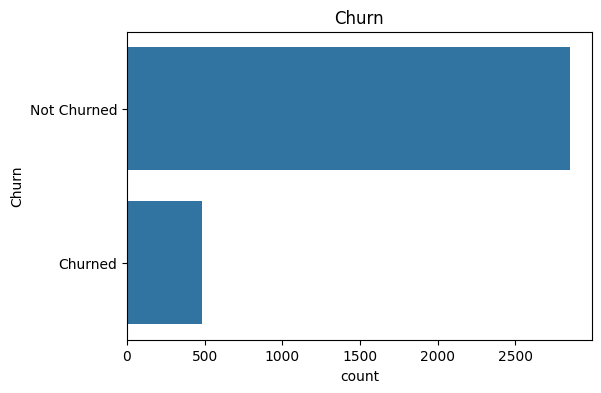

In [37]:
plt.figure(figsize=(6,4))
sn.countplot(churn['Churn'])
plt.title('Churn')
plt.show()